## Entregável 1

### Autor: Vítor Viana

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

### Descrição do dataset

As features disponíveis no dataset são:

> * data: registra o momento em que determinada medição foi realizada (ou deveria ter sido)

> * responsável: indica o jovem universitário no turno correspondente

A variável alvo de estudo é:

> * temperatura: mostra o valor medido com precisão de duas casas decimais

In [2]:
df = pd.read_csv("dataset1.csv")
df.head()

,data,responsável,temperatura
0,sábado - 01/04/2023 00:00,Fábio,19.59
1,sábado - 01/04/2023 00:15,Fábio,19.10
2,sábado - 01/04/2023 00:30,Fábio,19.14
3,sábado - 01/04/2023 00:45,Fábio,18.55
4,sábado - 01/04/2023 01:00,Fábio,NaN


In [3]:
df.shape

(2880, 3)

<div style="text-align: justify"> Desse reconhecimento inicial dos dados, pode-se concluir que alguns dados de temperatura estão faltando (conforme apresentado a seguir) e que a data não está em um formato adequado considerando que serão plotados gráficos para análises. Além disso, todas as features são importantes para a análise, não necessitando descartar nenhuma coluna. </div>

In [4]:
df.isnull().mean()

data           0.000000
responsável    0.000000
temperatura    0.028125
dtype: float64

### 1. Formatação da data

In [5]:
print(datetime.now())

2023-07-20 14:58:29.793600


<div style="text-align: justify"> O formato do datetime tomado como base é o formato apresentado acima. Assim, para transformar a data no formato desejado e sem perder informações do dataset original, optou-se por criar uma nova coluna referente ao dia da semana. </div>

In [6]:
dados_temperatura = df[['responsável', 'temperatura']]
dia_semana = []
data_hora = []
for i in range(len(df)):
    data_completa = df['data'].iloc[i].split(" - ")
    dia_semana.append(data_completa[0])
    data_hora.append(data_completa[1])
    
dados_temperatura.insert(0, "dia", dia_semana)
dados_temperatura.insert(1, "data_hora", data_hora)
dados_temperatura.head()

,dia,data_hora,responsável,temperatura
0,sábado,01/04/2023 00:00,Fábio,19.59
1,sábado,01/04/2023 00:15,Fábio,19.10
2,sábado,01/04/2023 00:30,Fábio,19.14
3,sábado,01/04/2023 00:45,Fábio,18.55
4,sábado,01/04/2023 01:00,Fábio,NaN


<div style="text-align: justify"> Para obter o formato desejado, utilizou-se a função <i>formata_data</i> implementada a seguir </div>

In [7]:
def formata_data(data_hora):
    data_hora = data_hora.split(" ")
    data, hora = data_hora[0], data_hora[1]
    dma = data.split("/") # dia mes ano
    dia, mes, ano = dma[0], dma[1], dma[2]
    data_formatada = ano + "-" + mes + "-" + dia + " " + hora 
    return data_formatada

datetime = dados_temperatura['data_hora'].apply(formata_data)
dados_temperatura.drop('data_hora', axis = 1, inplace = True)
dados_temperatura.insert(1, "data_hora", datetime)
dados_temperatura

,dia,data_hora,responsável,temperatura
0,sábado,2023-04-01 00:00,Fábio,19.59
1,sábado,2023-04-01 00:15,Fábio,19.10
2,sábado,2023-04-01 00:30,Fábio,19.14
3,sábado,2023-04-01 00:45,Fábio,18.55
4,sábado,2023-04-01 01:00,Fábio,NaN
...,...,...,...,...
2875,domingo,2023-04-30 22:45,Letícia,20.13
2876,domingo,2023-04-30 23:00,Letícia,19.62
2877,domingo,2023-04-30 23:15,Letícia,19.43
2878,domingo,2023-04-30 23:30,Letícia,19.25


### 2. Esboço do gráfico

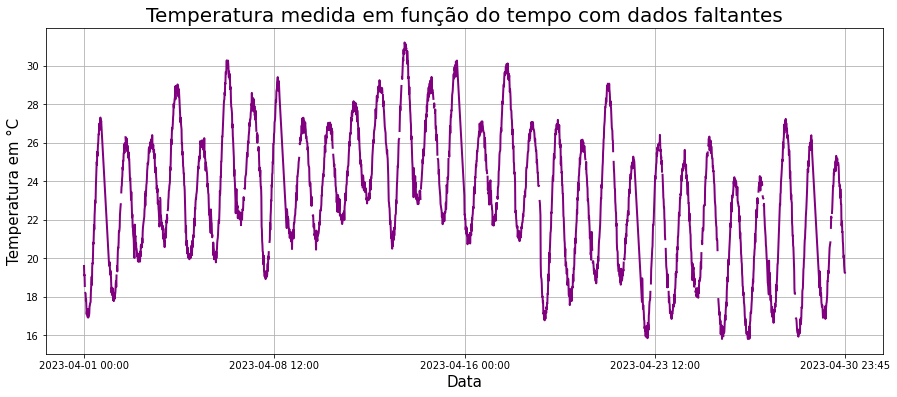

In [8]:
x = dados_temperatura['data_hora']
y = dados_temperatura['temperatura']

plt.figure(figsize=(15, 6))
plt.plot(x, y, color="purple", linewidth = 2)
plt.title('Temperatura medida em função do tempo com dados faltantes', fontsize= 20) # Adiciona o título do gráfico
plt.xlabel('Data',fontsize = 15) # Adiciona o título do eixo x
plt.ylabel('Temperatura em °C', fontsize = 15) # Adiciona o título do eixo y
plt.xticks([dados_temperatura.iloc[0,1],
            dados_temperatura.iloc[720,1],
            dados_temperatura.iloc[1440,1],
            dados_temperatura.iloc[2160,1],
            dados_temperatura.iloc[2879,1]])
plt.grid()
plt.show()

<div style="text-align: justify"> Da análise do gráfico é possível perceber que a temperatura apresenta oscilações consideráveis ao longo do tempo, sendo que apresenta um pico e um vale em um período de 24 horas, que correspondem em geral à temperatura ao dia (máxima) e a temperatura à noite (mínima), respectivamente. Além disso é notável que existem diversos dados faltantes, dada a descontinuidade presente na curva em alguns trechos. Por fim, um último fator é que até mais ou menos metade do mês as temperaturas médias diárias foram aumentando (de modo que a curva foi deslocada para cima) e a partir do meio do mês os valores voltaram a cair. </div>

### 3. Dados suspeitos

In [9]:
dados_temperatura['responsável'].unique()

array(['Fábio', 'Fernando', 'Júlia', 'Letícia', 'Marcela', 'Rafael'],
      dtype=object)

<div style="text-align: justify"> Para identificar se algum dos estudantes entregou dados suspeitos, optou-se por dividir o gráfico esboçado acima em quatro partes (dividiu-se o período de um mês em 4) para visualizar melhor a curva. Nesse sentido, analisando esse primeiro multiplot é possível perceber que em alguns trechos os dados parecem manipulados, uma vez que a curva aparenta um comportamento linear bem definido (assumiu-se uma linearidade da variação de temperatura ao longo do tempo). A título de exemplo, na figura 1 tem-se esse comportamento entre os dias 01/04 e 02/04 e na figura 2, logo no início também quando a temperatura começa a cair no dia 08/04. </div>

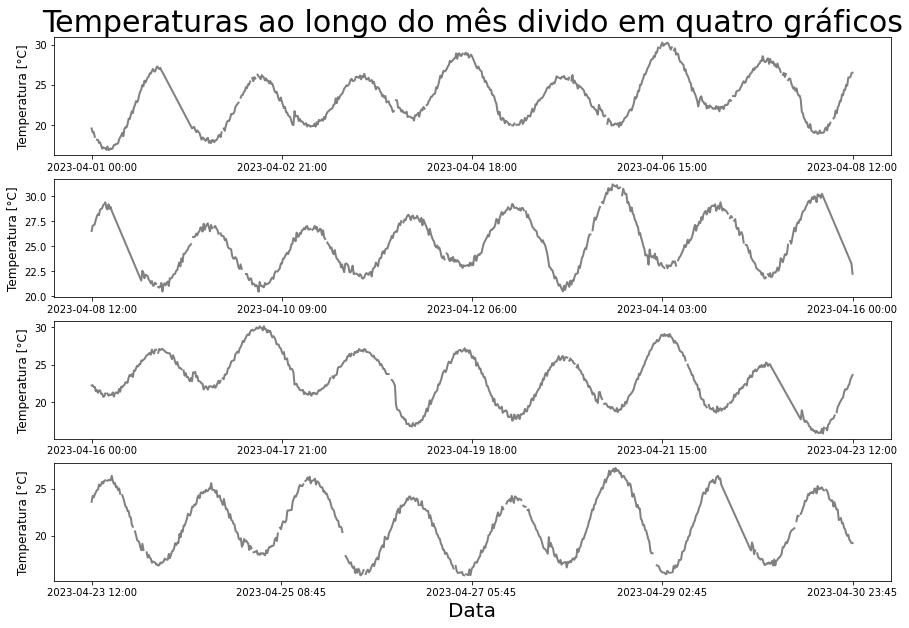

In [10]:
fig, axs = plt.subplots(4, 1, figsize=(15, 10))

# gráfico para o primeiro quarto do mês
n = 0
m = 720
x = dados_temperatura.loc[n:m, 'data_hora']
y = dados_temperatura.loc[n:m, 'temperatura']
axs[0].plot(x, y, color="gray", linewidth = 2)
axs[0].set_title('Temperaturas ao longo do mês divido em quatro gráficos', fontsize =30)
axs[0].set_ylabel('Temperatura [°C]', fontsize = 12)
axs[0].set_xticks(([dados_temperatura.iloc[n,1],
            dados_temperatura.iloc[n+(m-n)//4,1],
            dados_temperatura.iloc[n+2*(m-n)//4,1],
            dados_temperatura.iloc[n+3*(m-n)//4,1],
            dados_temperatura.iloc[m,1]]))

# gráfico para o segundo quarto do mês
n = 720
m = 1440
x = dados_temperatura.loc[n:m, 'data_hora']
y = dados_temperatura.loc[n:m, 'temperatura']
axs[1].plot(x, y, color="gray", linewidth = 2)
axs[1].set_ylabel('Temperatura [°C]', fontsize = 12)
axs[1].set_xticks(([dados_temperatura.iloc[n,1],
            dados_temperatura.iloc[n+(m-n)//4,1],
            dados_temperatura.iloc[n+2*(m-n)//4,1],
            dados_temperatura.iloc[n+3*(m-n)//4,1],
            dados_temperatura.iloc[m,1]]))

# gráfico para o terceiro quarto do mês
n = 1440
m = 2160
x = dados_temperatura.loc[n:m, 'data_hora']
y = dados_temperatura.loc[n:m, 'temperatura']
axs[2].plot(x, y, color="gray", linewidth = 2)
axs[2].set_ylabel('Temperatura [°C]', fontsize = 12)
axs[2].set_xticks(([dados_temperatura.iloc[n,1],
            dados_temperatura.iloc[n+(m-n)//4,1],
            dados_temperatura.iloc[n+2*(m-n)//4,1],
            dados_temperatura.iloc[n+3*(m-n)//4,1],
            dados_temperatura.iloc[m,1]]))

# gráfico para o último quarto do mês
n = 2160
m = 2879
x = dados_temperatura.loc[n:m, 'data_hora']
y = dados_temperatura.loc[n:m, 'temperatura']
axs[3].plot(x, y, color="gray", linewidth = 2)
axs[3].set_xlabel('Data', fontsize = 20)
axs[3].set_ylabel('Temperatura [°C]', fontsize = 12)
axs[3].set_xticks(([dados_temperatura.iloc[n,1],
            dados_temperatura.iloc[n+(m-n)//4,1],
            dados_temperatura.iloc[n+2*(m-n)//4,1],
            dados_temperatura.iloc[n+3*(m-n)//4,1],
            dados_temperatura.iloc[m,1]]))

plt.show()

<div style="text-align: justify"> Analisando o dataset e a data correspondente a um desses trechos lineares bem comportados da curva, percebe-se que um dos possíveis candidatos a terem entregado esses valores suspeitos é o Fernando. Dessa forma, realizou-se novamente o multiplot, destacando os trechos (em vermelho) em que esse estudante foi responsável pelos registros de temperatura. </div>

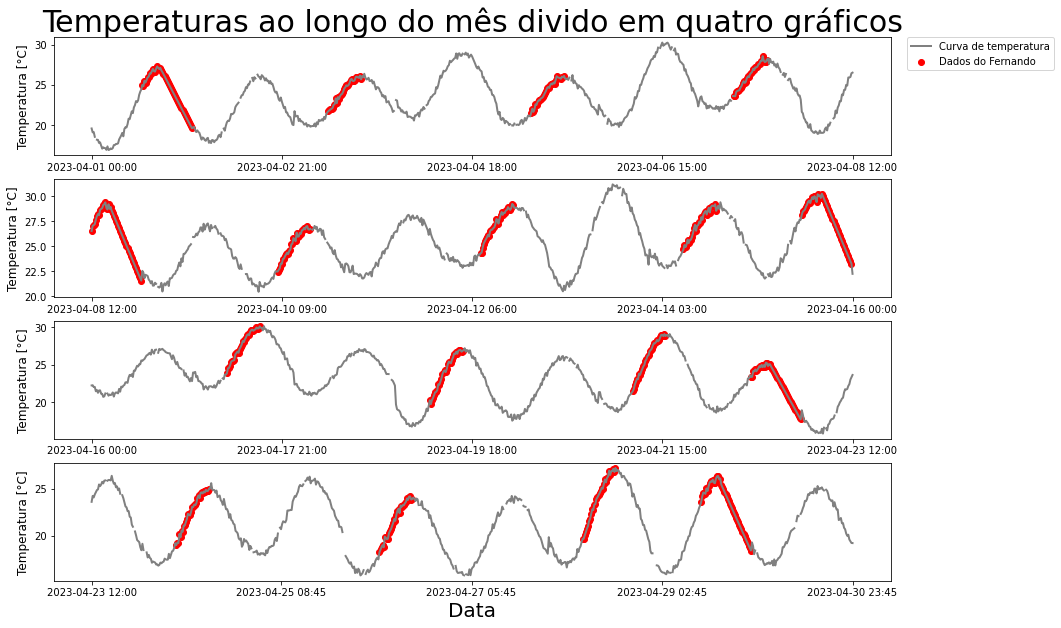

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(15, 10))

# gráfico para o primeiro quarto do mês
n = 0
m = 720
x = dados_temperatura.loc[n:m, 'data_hora']
y = dados_temperatura.loc[n:m, 'temperatura']
axs[0].plot(x, y, color="gray", linewidth = 2, label = 'Curva de temperatura')
axs[0].set_title('Temperaturas ao longo do mês divido em quatro gráficos', fontsize =30)
axs[0].set_ylabel('Temperatura [°C]', fontsize = 12)
axs[0].set_xticks(([dados_temperatura.iloc[n,1],
            dados_temperatura.iloc[n+(m-n)//4,1],
            dados_temperatura.iloc[n+2*(m-n)//4,1],
            dados_temperatura.iloc[n+3*(m-n)//4,1],
            dados_temperatura.iloc[m,1]]))

# localização das linhas correspondentes do estudante com dados suspeitos
rows = []
for i in range(m-n):
    if dados_temperatura['responsável'].iloc[i+n] == 'Fernando':
        rows.append(i+n)
x = dados_temperatura.loc[rows, 'data_hora']
y = dados_temperatura.loc[rows, 'temperatura']
axs[0].scatter(x, y, color="red", label = 'Dados do Fernando')
axs[0].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)

# gráfico para o segundo quarto do mês
n = 720
m = 1440
x = dados_temperatura.loc[n:m, 'data_hora']
y = dados_temperatura.loc[n:m, 'temperatura']
axs[1].plot(x, y, color="gray", linewidth = 2, label = 'Curva de temperatura')
axs[1].set_ylabel('Temperatura [°C]', fontsize = 12)
axs[1].set_xticks(([dados_temperatura.iloc[n,1],
            dados_temperatura.iloc[n+(m-n)//4,1],
            dados_temperatura.iloc[n+2*(m-n)//4,1],
            dados_temperatura.iloc[n+3*(m-n)//4,1],
            dados_temperatura.iloc[m,1]]))

# localização das linhas correspondentes do estudante com dados suspeitos
rows = []
for i in range(m-n):
    if dados_temperatura['responsável'].iloc[i+n] == 'Fernando':
        rows.append(i+n)
x = dados_temperatura.loc[rows, 'data_hora']
y = dados_temperatura.loc[rows, 'temperatura']
axs[1].scatter(x, y, color="red", label = 'Dados do Fernando')

# gráfico para o terceiro quarto do mês
n = 1440
m = 2160
x = dados_temperatura.loc[n:m, 'data_hora']
y = dados_temperatura.loc[n:m, 'temperatura']
axs[2].plot(x, y, color="gray", linewidth = 2, label = 'Curva de temperatura')
axs[2].set_ylabel('Temperatura [°C]', fontsize = 12)
axs[2].set_xticks(([dados_temperatura.iloc[n,1],
            dados_temperatura.iloc[n+(m-n)//4,1],
            dados_temperatura.iloc[n+2*(m-n)//4,1],
            dados_temperatura.iloc[n+3*(m-n)//4,1],
            dados_temperatura.iloc[m,1]]))

# localização das linhas correspondentes do estudante com dados suspeitos
rows = []
for i in range(m-n):
    if dados_temperatura['responsável'].iloc[i+n] == 'Fernando':
        rows.append(i+n)
x = dados_temperatura.loc[rows, 'data_hora']
y = dados_temperatura.loc[rows, 'temperatura']
axs[2].scatter(x, y, color="red", label = 'Dados do Fernando')

# gráfico para o último quarto do mês
n = 2160
m = 2879
x = dados_temperatura.loc[n:m, 'data_hora']
y = dados_temperatura.loc[n:m, 'temperatura']
axs[3].plot(x, y, color="gray", linewidth = 2, label = 'Curva de temperatura')
axs[3].set_xlabel('Data', fontsize = 20)
axs[3].set_ylabel('Temperatura [°C]', fontsize = 12)
axs[3].set_xticks(([dados_temperatura.iloc[n,1],
            dados_temperatura.iloc[n+(m-n)//4,1],
            dados_temperatura.iloc[n+2*(m-n)//4,1],
            dados_temperatura.iloc[n+3*(m-n)//4,1],
            dados_temperatura.iloc[m,1]]))

# localização das linhas correspondentes do estudante com dados suspeitos
rows = []
for i in range(m-n):
    if dados_temperatura['responsável'].iloc[i+n] == 'Fernando':
        rows.append(i+n)
x = dados_temperatura.loc[rows, 'data_hora']
y = dados_temperatura.loc[rows, 'temperatura']
axs[3].scatter(x, y, color="red", label = 'Dados do Fernando')

plt.show()

<div style="text-align: justify"> Assim, como todos os trechos com o comportamento descrito correspondem a dados enviados pelo Fernando, conclui-se que ele é o estudante que deve ser identificado por John. </div>

### 4. Lidando com dados ausentes

<div style="text-align: justify"> Considerando os valores ausentes, a estratégia adotada para imputação de dados para série temporal foi a de interpolação, a qual leva em conta tanto valores anteriores quanto posteriores ao valor faltante. Dentro das opções de interpolação, utilizou-se <i>'time'</i> para pegar valores mais próximos ao horário da medição considerada. </div>

In [12]:
dados_temperatura['temperatura'].interpolate(option='time', inplace = True)
dados_temperatura.isnull().mean()

dia            0.0
data_hora      0.0
responsável    0.0
temperatura    0.0
dtype: float64

<div style="text-align: justify"> Para checar o resultado dessa operação, além de ver que não há mais dados faltantes no dataset modificado, foi plotado novamente o gráfico para ver se o comportamento é coerente com o esperado. </div>

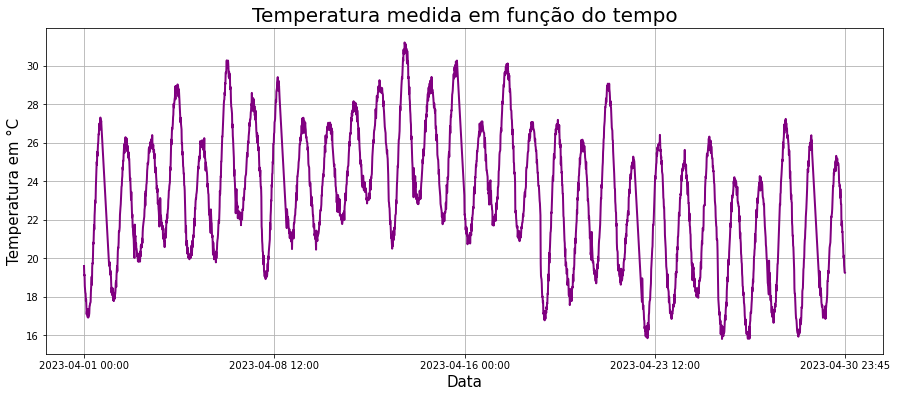

In [13]:
x = dados_temperatura['data_hora']
y = dados_temperatura['temperatura']

plt.figure(figsize=(15, 6))
plt.plot(x, y, color="purple", linewidth = 2)
plt.title('Temperatura medida em função do tempo', fontsize= 20) # Adiciona o título do gráfico
plt.xlabel('Data',fontsize = 15) # Adiciona o título do eixo x
plt.ylabel('Temperatura em °C', fontsize = 15) # Adiciona o título do eixo y
plt.xticks([dados_temperatura.iloc[0,1],
            dados_temperatura.iloc[720,1],
            dados_temperatura.iloc[1440,1],
            dados_temperatura.iloc[2160,1],
            dados_temperatura.iloc[2879,1]])
plt.grid()
plt.show()

### 5. Análise de temperatura mínima nas quartas-feiras do mês

<div style="text-align: justify"> Supondo que se tenha o interesse em determinar qual foi a quarta-feira mais fria do mês, uma forma de atingir esse objetivo é analisar as linhas cujo dia da semana correspondente é <i>'quarta'</i> e determinar o valor mínimo utilizando funções de descrição estatística. Em seguida, para determinar o dia correspondente, é possível isolar a linha do dataset correspondente a esse valor e obter todos os dados que ela contém.  </div>

In [14]:
dados_temperatura['dia'].unique()

array(['sábado', 'domingo', 'segunda', 'terça', 'quarta', 'quinta',
       'sexta'], dtype=object)

In [15]:
dados_quartafeira = dados_temperatura[dados_temperatura['dia'] == 'quarta']
dados_quartafeira.describe()

,temperatura
count,384.000000
mean,22.741979
std,3.470539
min,15.800000
25%,20.142500
50%,23.245000
75%,25.452500
max,29.240000


In [16]:
linha_Tmin = dados_quartafeira[dados_quartafeira['temperatura'] == dados_quartafeira['temperatura'].min()]
linha_Tmin

,dia,data_hora,responsável,temperatura
2414,quarta,2023-04-26 03:30,Fábio,15.8


<div style="text-align: justify"> Portanto, a quarta-feira mais fria do mês foi a do dia 26, às 3:30 da madrugada (condizente com o gráfico esboçado anteriormente em que as mínimas ocorrem no período noturno) e a temperatura mínima foi de 15,8 °C.  </div>

### 6. Gráfico com as temperaturas máximas, mínimas e médias ao longo do mês

<div style="text-align: justify"> Inicialmente foi realizada uma manipulação dos dados a fim de criar os arrays que seriam utilizados para plotar o gráfico. Para deixar a curva mais suave (próxima à do exemplo do excel) foi realizada em seguida uma interpolação com splines e obteve-se o gráfico com as temperaturas máximas e mínimas, destacando ainda os extremos e a média dos valores em cada curva. </div>

In [17]:
xaxis = [ ] # lista para armazenar o dia do mês
data_array = [ ] # lista para a data correspondente
for i in range(len(dados_temperatura)):
    data_hora = dados_temperatura.iloc[i,1].split(" ")
    data = data_hora[0]
    dma = data.split("-") # dia mes ano
    dia = int(dma[2])
    if dia not in xaxis:
        xaxis.append(dia)
        data_array.append(data)

In [18]:
tmax = [ ]
tmin = [ ]
for data in data_array:
    temperaturas = dados_temperatura[dados_temperatura['data_hora'].str.contains(pat = data)]
    tmax.append(temperaturas['temperatura'].max())
    tmin.append(temperaturas['temperatura'].min())

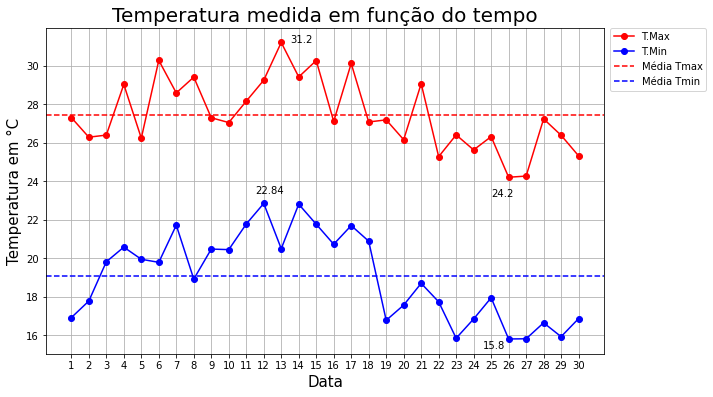

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(xaxis, tmax, color="red", marker = 'o', label = 'T.Max')
plt.title('Temperatura medida em função do tempo', fontsize= 20) # Adiciona o título do gráfico
plt.xlabel('Data',fontsize = 15) # Adiciona o título do eixo x
plt.ylabel('Temperatura em °C', fontsize = 15) # Adiciona o título do eixo y

plt.plot(xaxis, tmin, color="blue", marker = 'o', label = 'T.Min')
plt.grid()
plt.xticks(xaxis)

# máxima das temperaturas máximas
plt.annotate(str(np.max(tmax)), (np.argmax(tmax), np.max(tmax)),
             xytext=(np.argmax(tmax) + 1.5, np.max(tmax)))

# mínima das temperaturas máximas
plt.annotate(str(np.min(tmax)), (np.argmin(tmax), np.min(tmax)),
             xytext=(np.argmin(tmax), np.min(tmax) - 1))

# média das temperaturas máximas
plt.axhline(np.mean(tmax), color='red', linestyle='dashed', label='Média Tmax')

# máxima das temperaturas mínimas
plt.annotate(str(np.max(tmin)), (np.argmax(tmin), np.max(tmin)),
             xytext=(np.argmax(tmin) + 0.5, np.max(tmin) + 0.5))

# mínima das temperaturas mínimas
plt.annotate(str(np.min(tmin)), (np.argmin(tmin), np.min(tmin)),
             xytext=(np.argmin(tmin) - 0.5, np.min(tmin) - 0.5))

# média das temperaturas mínimas
plt.axhline(np.mean(tmin), color='blue', linestyle='dashed', label='Média Tmin')

plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0.)
plt.show()

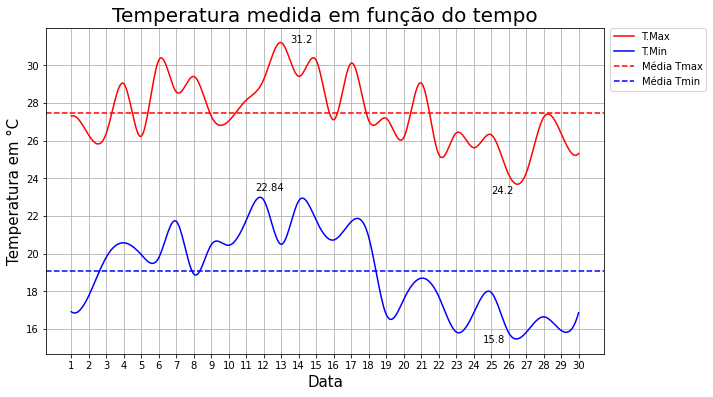

In [20]:
from scipy.interpolate import make_interp_spline

X_Y_Spline1 = make_interp_spline(xaxis, tmax)
X_Y_Spline2 = make_interp_spline(xaxis, tmin)

X_ = np.linspace(xaxis[0], xaxis[-1], 500)
Y_1 = X_Y_Spline1(X_)
Y_2 = X_Y_Spline2(X_)

plt.figure(figsize=(10, 6))
plt.plot(X_, Y_1, color="red", label='T.Max')
plt.title('Temperatura medida em função do tempo', fontsize= 20) # Adiciona o título do gráfico
plt.xlabel('Data',fontsize = 15) # Adiciona o título do eixo x
plt.ylabel('Temperatura em °C', fontsize = 15) # Adiciona o título do eixo y

plt.plot(X_, Y_2, color="blue", label='T.Min')
plt.grid()
plt.xticks(xaxis)

# máxima das temperaturas máximas
plt.annotate(str(np.max(tmax)), (np.argmax(tmax), np.max(tmax)),
             xytext=(np.argmax(tmax) + 1.5, np.max(tmax)))

# mínima das temperaturas máximas
plt.annotate(str(np.min(tmax)), (np.argmin(tmax), np.min(tmax)),
             xytext=(np.argmin(tmax), np.min(tmax) - 1))

# média das temperaturas máximas
plt.axhline(np.mean(tmax), color='red', linestyle='dashed', label='Média Tmax')

# máxima das temperaturas mínimas
plt.annotate(str(np.max(tmin)), (np.argmax(tmin), np.max(tmin)),
             xytext=(np.argmax(tmin) + 0.5, np.max(tmin) + 0.5))

# mínima das temperaturas mínimas
plt.annotate(str(np.min(tmin)), (np.argmin(tmin), np.min(tmin)),
             xytext=(np.argmin(tmin) - 0.5, np.min(tmin) - 0.5))

# média das temperaturas mínimas
plt.axhline(np.mean(tmin), color='blue', linestyle='dashed', label='Média Tmin')

plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0.)
plt.show()